In [30]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False #步骤二（解决坐标轴负数的负号显示问题）

In [31]:
im = cv2.imread('dev/0001.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

In [32]:
im_cropped = im[im.shape[0]//12:int(2.2*im.shape[0]//12), int(im.shape[1]/15):int(im.shape[1]/2.6), :]
im_gray = cv2.cvtColor(im_cropped, cv2.COLOR_RGB2GRAY)
im_gray_reversed = 255 - im_gray

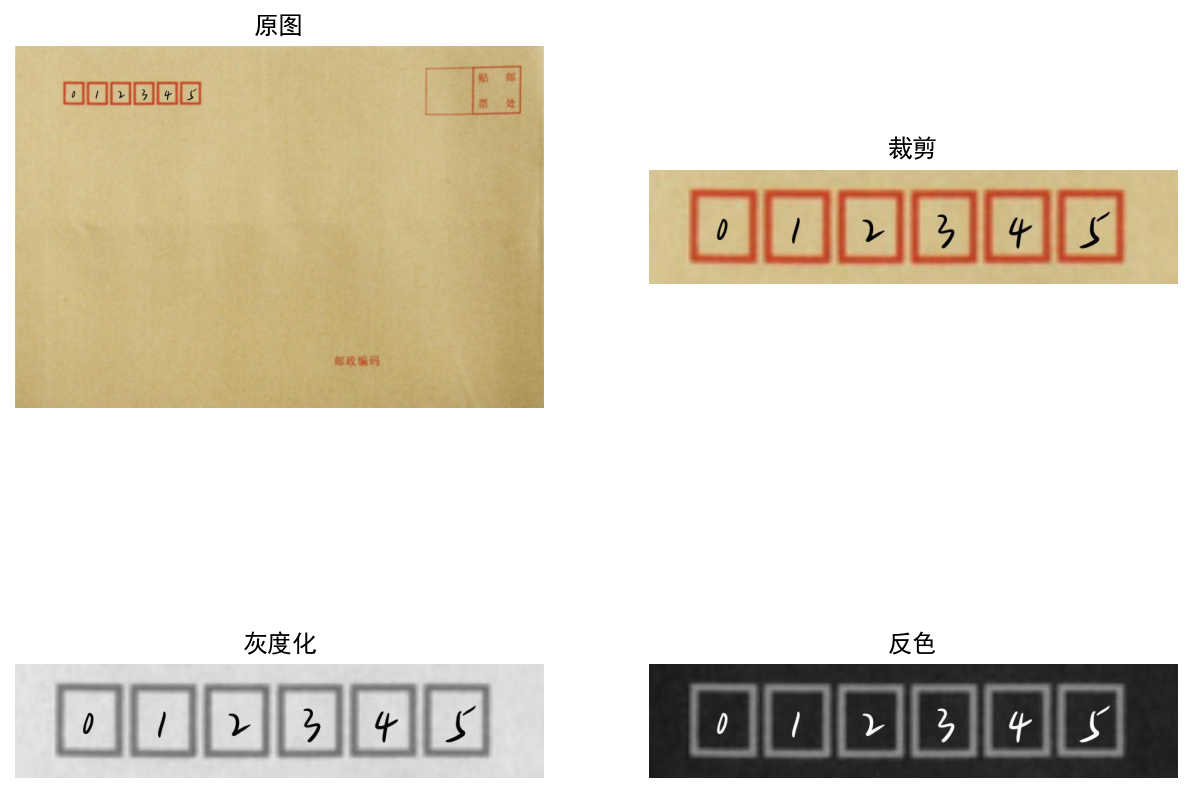

In [33]:
plt.figure(figsize=(10,8),dpi=150)
plt.subplot(2,2,1)
plt.title('原图')
plt.axis('off')
plt.imshow(im)
plt.subplot(2,2,2)
plt.title('裁剪')
plt.axis('off')
plt.imshow(im_cropped)
plt.subplot(2,2,3)
plt.title('灰度化')
plt.axis('off')
plt.imshow(im_gray, cmap='gray')
plt.subplot(2,2,4)
plt.title('反色')
plt.axis('off')
plt.imshow(im_gray_reversed, cmap='gray')

plt.savefig("fig-preprocess.svg")

In [34]:
im_bin = cv2.threshold(im_gray_reversed/255, 0.5, 1,cv2.THRESH_BINARY)[1]

In [35]:
im_right = np.roll(im_bin, shift=(1,), axis=(1,))
im_up  = np.roll(im_bin, shift=(-1,), axis=(0,))

im_right = np.logical_or(im_bin, im_right)
im_up = np.logical_or(im_bin, im_up)

im_right = np.logical_xor(im_bin, im_right)
im_up = np.logical_xor(im_bin, im_up)

im_edge = np.logical_or(im_right, im_up)

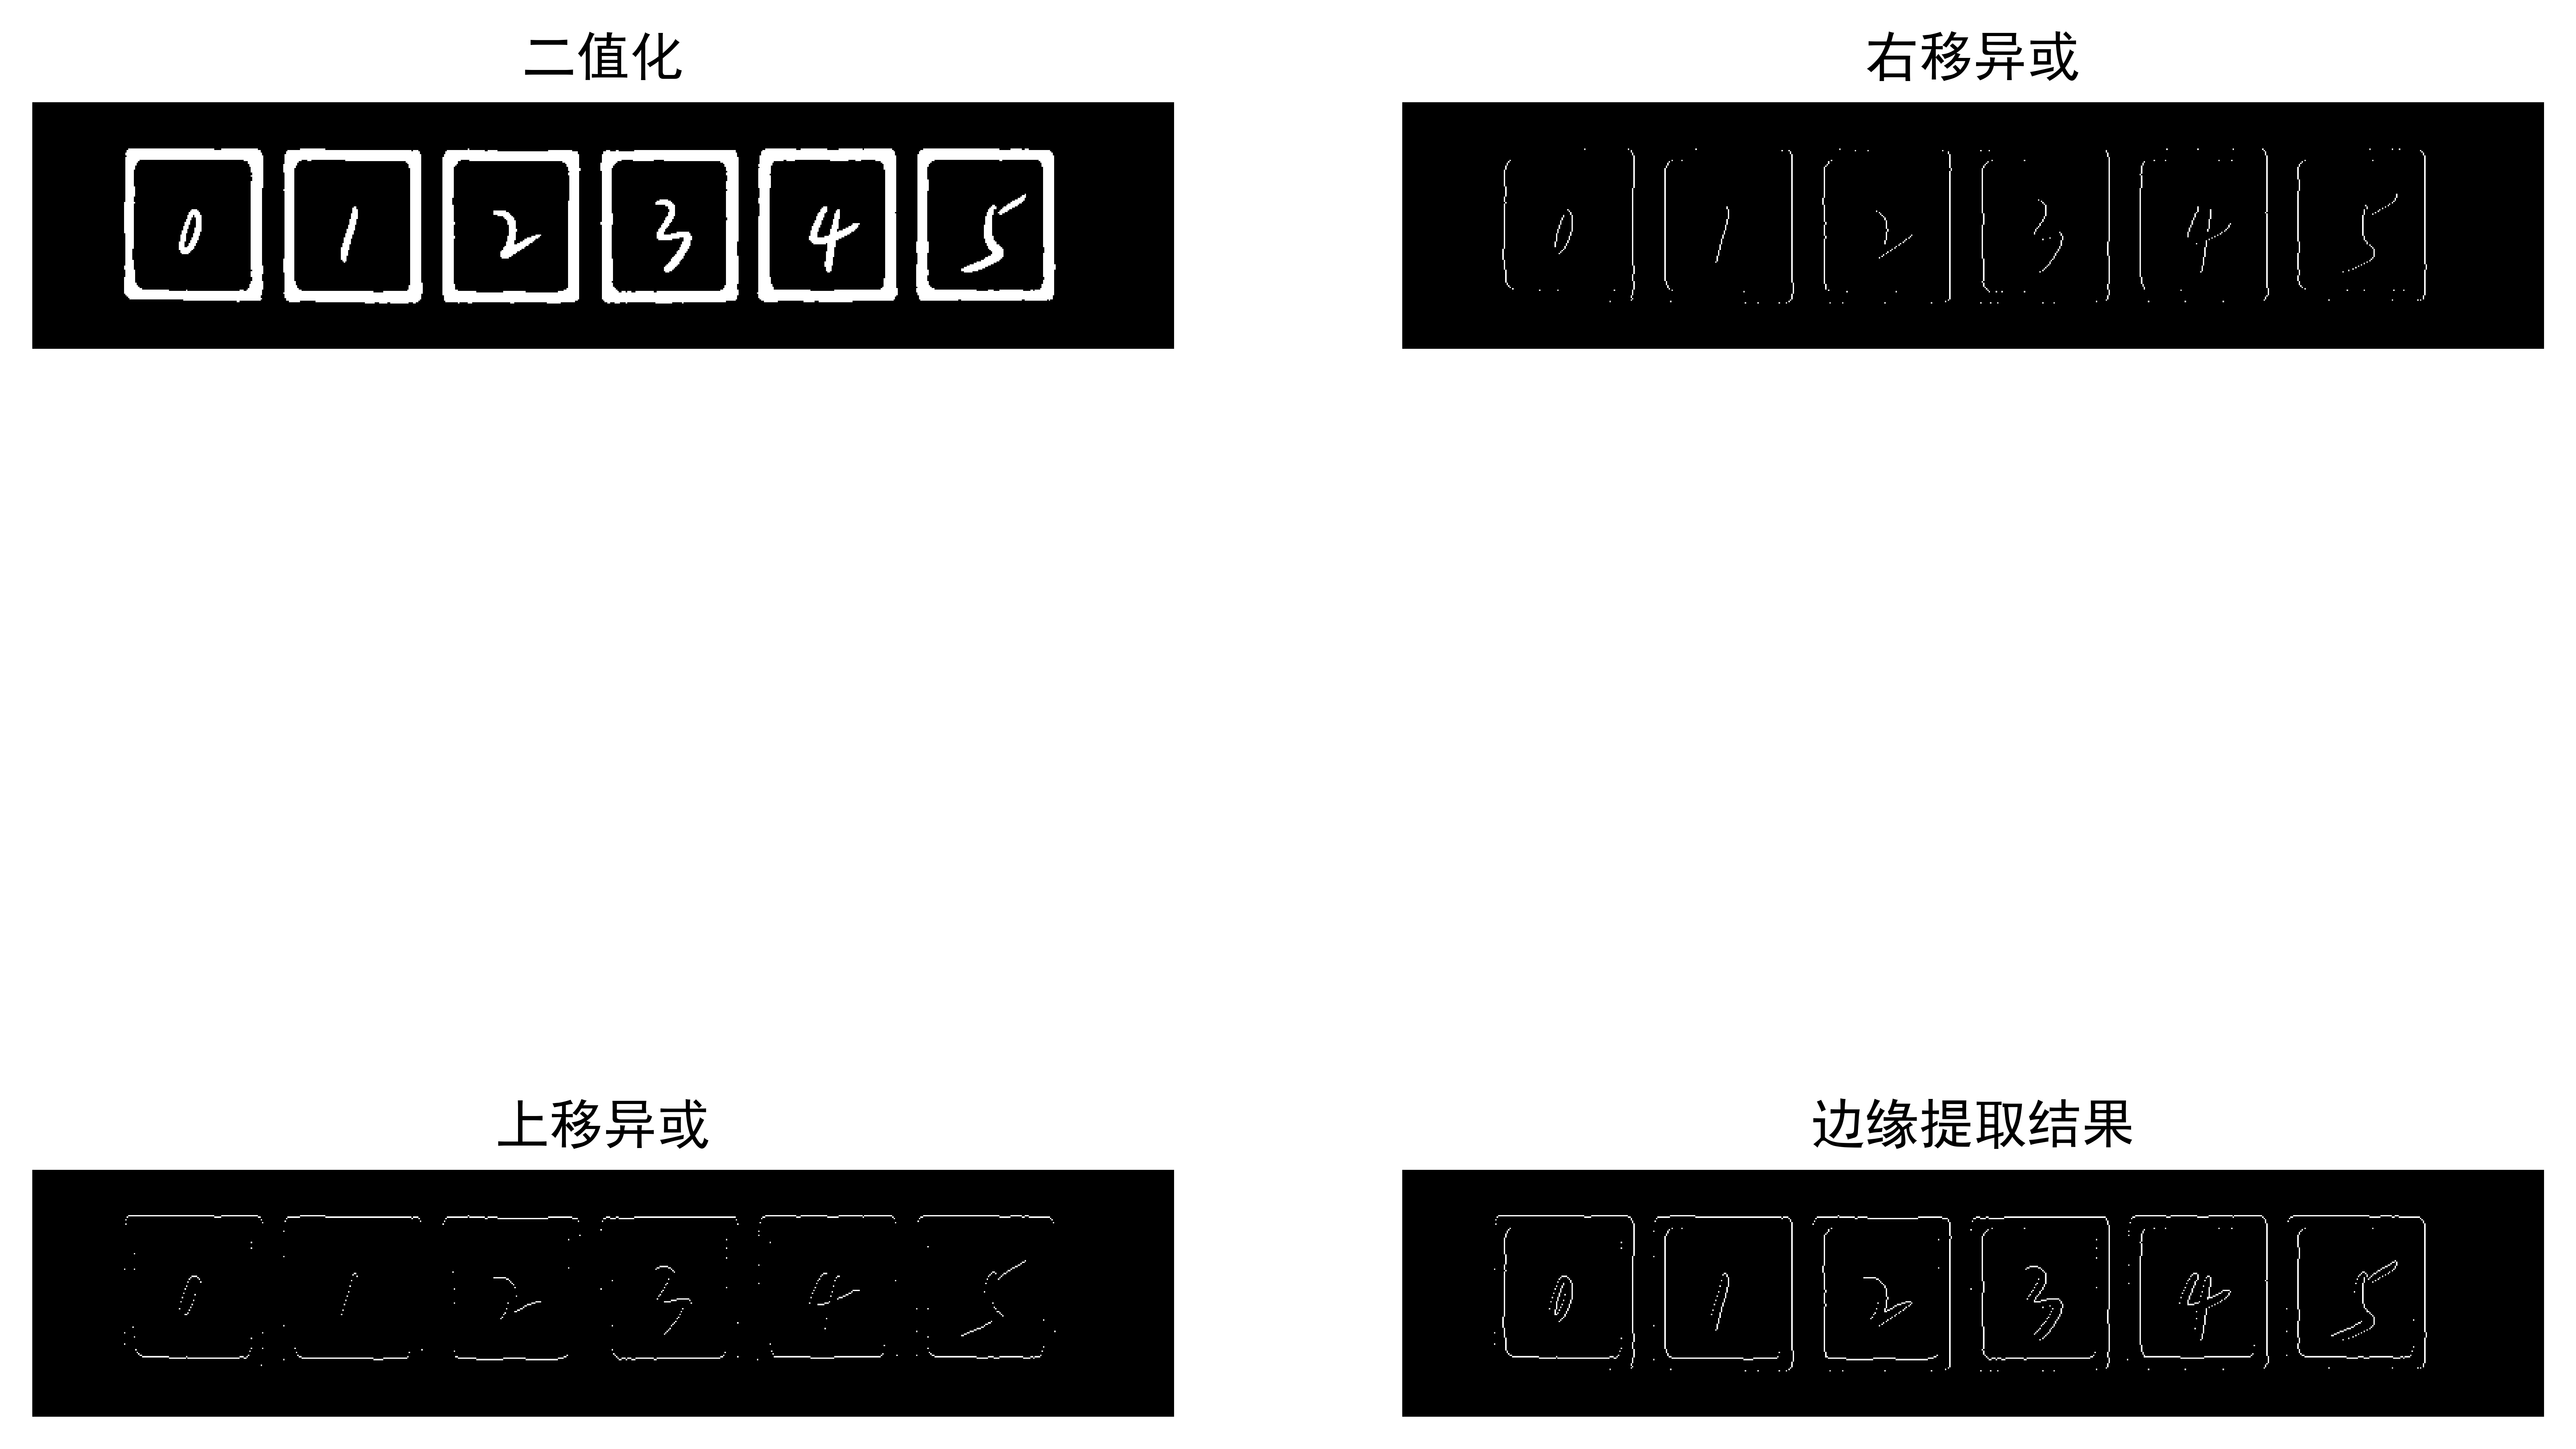

In [36]:
plt.figure(figsize=(10,8),dpi=1024)
plt.subplot(2, 2, 1)
plt.axis('off')
plt.title("二值化")
plt.imshow(im_bin, cmap='gray')

plt.subplot(2, 2, 2)
plt.axis('off')
plt.title("右移异或")
plt.imshow(im_right, cmap='gray')

plt.subplot(2, 2, 3)
plt.axis('off')
plt.title("上移异或")
plt.imshow(im_up, cmap='gray')

plt.subplot(2, 2, 4)
plt.axis('off')
plt.title("边缘提取结果")
plt.imshow(im_edge, cmap='gray')

plt.savefig("fig-edge.svg")

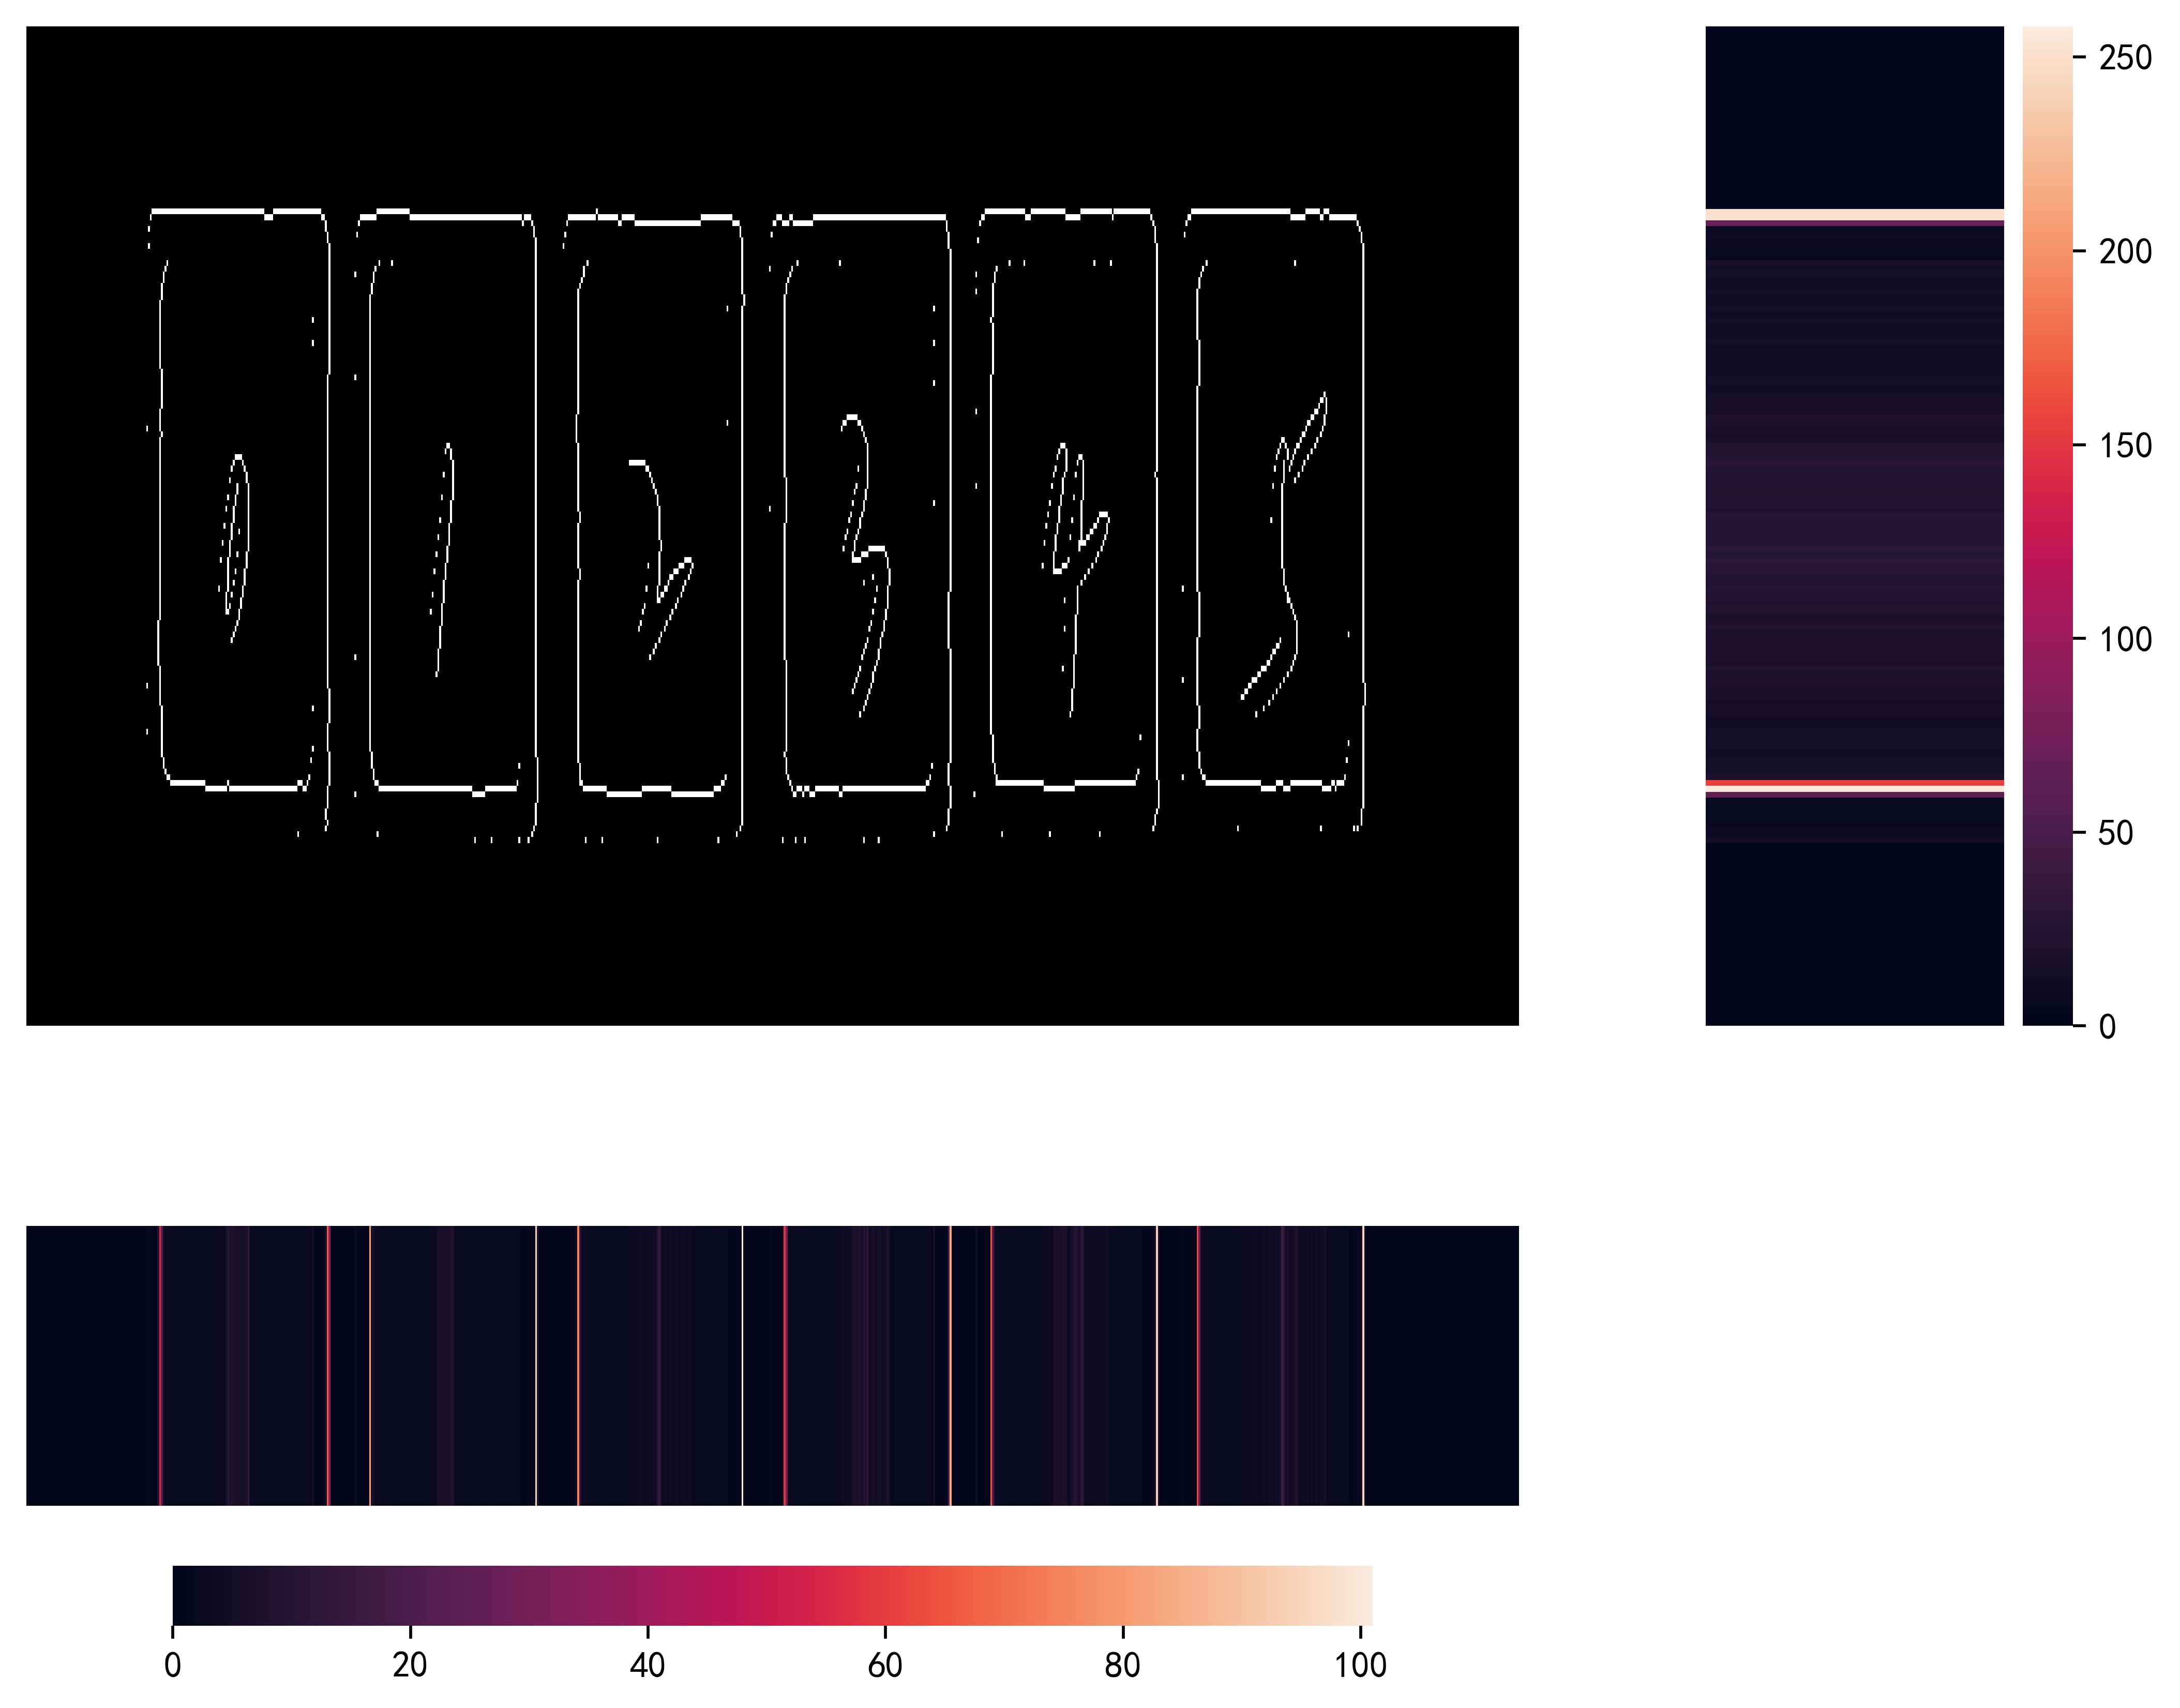

In [37]:
plt.figure(figsize=(10,8),dpi=512)
grid = plt.GridSpec(3, 4, wspace=0.5, hspace=0.5)
ax_0 = plt.subplot(grid[0:2,0:3])
plt.axis('off')
ax_0=plt.imshow(im_edge, cmap='gray',aspect='auto')

ax_1 = plt.subplot(grid[0:2,3])
plt.axis('off')
sns.heatmap(im_edge.sum(1)[:,np.newaxis], vmin=0, vmax=im_edge.sum(1)[np.newaxis,:].max(), ax=ax_1)

ax_2 = plt.subplot(grid[2,0:3])
plt.axis('off')
sns.heatmap(im_edge.sum(0)[np.newaxis,:], vmin=0, vmax=im_edge.sum(0)[np.newaxis,:].max(),cbar_kws={"orientation": "horizontal"}, ax=ax_2)

plt.savefig("fig-heatmap.svg")